In this project, I implemented a **Spam Classification Model** using
**Multinomial Naive Bayes (MNB)**.

The dataset used is the **SMS Spam Collection**, containing text messages
labeled as either "ham" (not spam) or "spam".

The text data was converted into numerical features using **CountVectorizer**
(BagofWords). MNB then calculates the probability of a message being spam or ham
based on the frequency of words in the message.

I also applied **Laplace Smoothing (alpha)** to handle zero probabilities
and used GridSearchCV to find the best hyperparameter.

In [1]:
# Importing necessary packages for multinomial naive bayes


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

# I downloaded this spam classifcation folder from above

In [3]:
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])

# Doing cleaning with proper column name


In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Encoding  labels, ham = 0, spam = 1 with new column
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
# doing train test split with 20 percent test data

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

In [8]:


# Doing Vectorization (Bag of Words) method embedding of sentence though not
#as rich as contextual embedding
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
 #MultinomialNB with Hyperparameter Tuning

 # Alpha is Laplace  smoothing avoids divison by 0 ,if a word does not pop up in training data

 #same like var smoothing in G NB.
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
mnb = MultinomialNB()
grid = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_vec, y_train)


In [11]:
# Getting best parameters

best_mnb = grid.best_estimator_
print("Best alpha:", grid.best_params_)

Best alpha: {'alpha': 5.0}


In [12]:
# Predicting on x test

y_pred = best_mnb.predict(X_test_vec)


In [13]:
#Evaluation  report
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9811659192825112

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



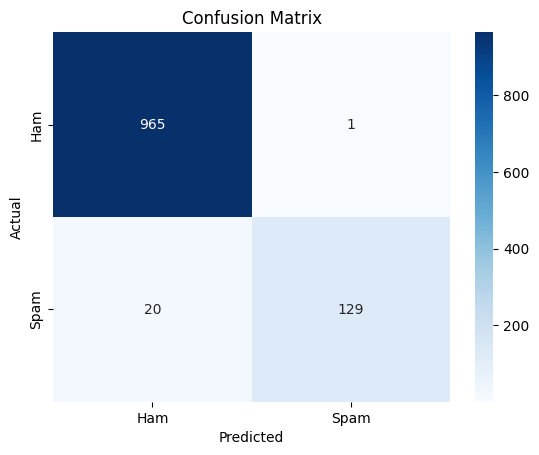

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Top 20 spammy words

In [24]:
import numpy as np

# Getting  feature names
feature_names = vectorizer.get_feature_names_out()

# Getting  log probs for spam class
spam_word_log_probs = best_mnb.feature_log_prob_[1] # 1 row is spam

# Top 20 spam words
top_spam_idx = np.argsort(spam_word_log_probs)[-20:]  # arg sort low to high and last highest 20 ones
print("Top Spam Words:")
for i in reversed(top_spam_idx):
    print(feature_names[i], spam_word_log_probs[i])  # print the words and log probs

    # real prob between 0 and 1 become negative when i take natural log

Top Spam Words:
free -5.527496719760371
txt -5.82059885968149
ur -5.935668189466278
stop -6.113123556609059
text -6.132732027997435
claim -6.152732694704105
mobile -6.204557762568691
reply -6.24804287450843
www -6.293505248585188
prize -6.47118642582264
cash -6.499357302789336
uk -6.528344839662588
won -6.55819780281227
just -6.573465274943058
send -6.636978680665384
new -6.653507982616595
150p -6.670315100932975
win -6.687409534292276
urgent -6.704801277004145
nokia -6.722500854103545


In [26]:
# converting back to probabilty

spam_word_probs=np.exp(spam_word_log_probs)# using the exponential function

top_spam_idx = np.argsort(spam_word_probs)[-20:]
print("Top Spam Words with Probabilities:")
for i in reversed(top_spam_idx):
    print(f"{feature_names[i]}: {spam_word_probs[i]:.4f}")

Top Spam Words with Probabilities:
free: 0.0040
txt: 0.0030
ur: 0.0026
stop: 0.0022
text: 0.0022
claim: 0.0021
mobile: 0.0020
reply: 0.0019
www: 0.0018
prize: 0.0015
cash: 0.0015
uk: 0.0015
won: 0.0014
just: 0.0014
send: 0.0013
new: 0.0013
150p: 0.0013
win: 0.0012
urgent: 0.0012
nokia: 0.0012


The Multinomial Naive Bayes model achieved an accuracy of ~98% on the
test set, making it highly effective for spam detection.

From the word-level probabilities, we observed that words such as
**"free"**, **"win"**, **"cash"**, and **"urgent"**
had the highest association with spam messages.

This interpretability makes Naive Bayes a strong baseline for text classification,
as it not only provides high accuracy but also reveals which words drive
the classification decision.

In practice, while modern approaches like **BERT embeddings** can further
improve performance by capturing context, Multinomial Naive Bayes remains
a reliable, lightweight, and explainable choice for spam classification tasks.